In [1]:
%run "../../shared/utilz_includez.ipynb"

In [9]:
from skimage import io, img_as_float, img_as_ubyte 
from scipy import ndimage as nd

In [5]:
def plot_image( img_array , plotit=True, title=None, cmapd='gray'):     
    print( f"\n{ '-'*7 } { title if title else type(img_array) } { '-'*7 }" )
    print( f"image.shape = {img_array.shape}" ) 
    print( f"datatype = {img_array.dtype}")
    print( f"min = {np.min(img_array)} , max = {np.max(img_array)}\n" )
    if plotit:
        if cmapd:
            plt.imshow( img_array , cmap=cmapd)
        else:
            plt.imshow( img_array )
    if title:
        plt.title(title)
        

# Key points, Detectors and Descriptors in OpenCV
- **Feature:**
- **Key Point:** Small region of interest 
- **Detector:** Identifies useful key points
- **Descriptor:** Describes the selected key point 

**OpenCV Modules**
- `cv2.Harris` 
    - works on gray images that are float32

**Application:**
- E.G. things may move on a microscope, so can keep track of key points and use them to translate back to original image
- 

In [21]:
from skimage.transform import warp, AffineTransform

import cv2



------- original -------
image.shape = (1824, 2740, 3)
datatype = uint8
min = 0 , max = 255


------- clockwise rotate -------
image.shape = (2811, 3254, 3)
datatype = uint8
min = 0 , max = 255


------- affine/shear -------
image.shape = (1824, 2740, 3)
datatype = float64
min = 0.0 , max = 1.0



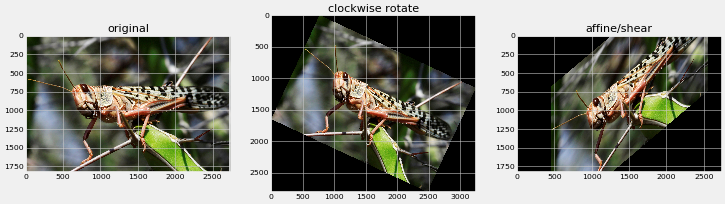

In [33]:
imgpath = "https://africa.cgtn.com/wp-content/photo-gallery/2020/02/2020-01-22T103157Z_898438309_RC2YKE9Z84W6_RTRMADP_3_INDIA-LOCUSTS.jpg"

img = io.imread( imgpath )

img2 = nd.rotate( img, -25)

af = AffineTransform( scale=(1, 1), rotation=37, shear=0.7, translation=(img.shape[0]/4, img.shape[1]/4) )
# img3 =  nd.rotate( img, 137) #nd.affine_transform(nd.rotate( img, 137) , np.ones( (3,3)))
img3 = warp( img, af.inverse)

nr, nc = 1, 3

plt.subplot(nr, nc, 1)
plot_image( img, title="original")

plt.subplot(nr, nc, 2)
plot_image( img2, title="clockwise rotate")

plt.subplot(nr, nc, 3)
plot_image( img3, title="affine/shear"); 

In [68]:
## HARRIS 
# requires grayscale and float32
ip = "https://i.pinimg.com/originals/2f/8f/85/2f8f85ed75e06200c4510778285d1e0e.jpg"
himg = io.imread(ip)
gimg = np.float32( cv2.cvtColor(himg, cv2.COLOR_BGR2GRAY ) )

harris = cv2.cornerHarris( gimg, 2, 3, 0.04)

print( harris)


[[ 3.78421879e+00  3.78421879e+00 -1.29004834e+03 ...  9.66573672e+04
   1.26624219e+04  6.41261797e+04]
 [ 3.78421879e+00  3.78421879e+00 -1.29004834e+03 ...  9.66573672e+04
   1.26624219e+04  6.41261797e+04]
 [ 9.89457035e+00  9.89457035e+00 -3.03403027e+03 ...  8.02141484e+04
  -5.81762188e+04  3.31067344e+04]
 ...
 [ 9.75651428e+02  9.75651428e+02  1.28206519e+03 ... -1.00190625e+03
   4.08477271e+03  2.67865957e+04]
 [ 1.72649994e+01  1.72649994e+01 -1.58638672e+02 ... -5.78472510e+03
   2.96391172e+04  8.82663125e+04]
 [ 4.98828125e+00  4.98828125e+00 -1.05981674e+02 ... -2.67228027e+02
  -3.66295000e+04 -3.91239219e+04]]



------- Orignal -------
image.shape = (640, 320, 3)
datatype = uint8
min = 0 , max = 255


------- Orignal Gray -------
image.shape = (640, 320)
datatype = float32
min = 3.0 , max = 236.0


------- Above threshold 1.0% of Harris max -------
image.shape = (640, 320, 3)
datatype = uint8
min = 0 , max = 255



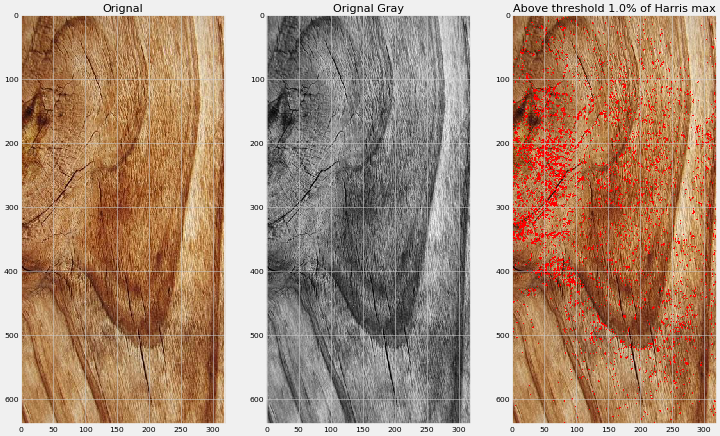

In [73]:
nr, nc = 1, 3

hp = 0.01

## show harris at threshold 1% of max as blue
oimg = himg.copy()
oimg[ harris > hp*harris.max() ] = [255, 0, 0] #BGR if read cv2 else RGB

plt.subplot(nr, nc, 1)
plot_image( himg, title="Orignal"); 

plt.subplot(nr, nc, 2)
plot_image( gimg, title="Orignal Gray"); 

plt.subplot(nr, nc, 3)
plot_image( oimg, title= f"Above threshold {hp*100}% of Harris max"); 